In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce

In [130]:
def read_cred():
    f = open("../../../cred.txt", "r")
    cred = f.read()
    f.close()
    return cred

In [131]:
def get_OI(url,start,end,interval='PT1M',tag='xx',auth='xx',hS='00',hF='23'):
	url_all =url+'data-reference='+tag+'&aggregation=TIME'+'&aggregation-function=MEAN'+"&from="+start+"T"+hS+"%3A00%3A00.000Z&to="+end+"T"+hF+"%3A59%3A59.000Z&aggregation-period="+interval
	d_data = pd.read_json(url_all,storage_options={ 'Authorization': 'basic '+auth})
	# print(d_data['values'][0])
	arr = np.asarray(np.asarray(d_data['values'])[0])
	return d_data['values'][0]

In [132]:
urlBase = 'https://oianalytics-100.optimistik.fr/api/oianalytics/time-values/query?'
credentials = read_cred()

In [301]:
def get_data(tags):
    liste = list(range(0))
    for tag in tags:
        data = get_OI(urlBase,'2021-08-01','2021-12-31','PT1H',tag,credentials,'00','23')
        df = pd.DataFrame(data)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.set_index('timestamp')
        df = df.rename(columns={'value':tag})
        liste.append(df)
    return liste

In [302]:
def merge_data(liste):
    df = reduce(lambda left,right : pd.merge(left, right,left_index=True,right_index=True,how='outer'),liste)
    return df

In [303]:
tags = ['E-T15223','E-T18223','3B-T99994','E-FC16325','E-FCS14325','E-FCS12085','E-QUR-E2']
#tags = ['E-T15223','E-T18223','E-FCS14325','E-FC16325','E-FCS12085','E-LS18603','E-LC18604','E-LS15603','E-LC15604','E-FS31053','E-PD15010','E-PD18010','3B-T99994','E-QUR-E2','ROC_E2_Prod_MMP_brut','E-FQ41504','E-TC18202','E-TC15202']
df_list = get_data(tags)
data = merge_data(df_list)
result = data.copy()
result.describe()

,E-T15223,E-T18223,3B-T99994,E-FC16325,E-FCS14325,E-FCS12085,E-QUR-E2
count,3671.000000,3671.000000,3657.000000,3671.000000,3671.000000,3671.000000,3.671000e+03
mean,391.993996,384.411896,14.575218,8285.828469,4394.104563,46553.135497,1.767807e+03
std,19.474867,19.670996,7.701158,2306.649588,1094.964408,11906.241790,3.711116e+04
min,268.673383,248.398367,-1.130990,0.153171,44.979765,8.156510,-1.003064e+06
25%,391.564592,383.270800,8.001803,7477.549167,3862.646917,44007.632500,5.164108e+02
50%,396.847550,387.968217,14.473437,9571.535333,4729.008833,52490.435000,5.198042e+02
75%,400.199350,392.973892,20.228987,9596.383917,4802.018083,52500.748333,5.236046e+02
max,418.848483,411.079783,37.354712,9802.977667,7274.070000,52528.136667,1.147618e+06


## Filtre

In [304]:
def filtering(df):
    df = df[(df['E-QUR-E2']>500) & (df['E-QUR-E2']<600)]
    df = df[df['E-T15223']>390]
    df = df[df['E-FC16325']>9500]
    df = df[df['E-FCS12085']>52400]
    return df

In [305]:
result = filtering(result)
result.describe()

,E-T15223,E-T18223,3B-T99994,E-FC16325,E-FCS14325,E-FCS12085,E-QUR-E2
count,1995.000000,1995.000000,1981.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,398.992322,388.366312,14.533678,9594.727032,4913.963480,52499.930462,520.609023
std,4.201412,3.953880,7.893969,21.438156,249.148002,7.724557,4.710344
min,390.011550,379.408383,-1.130990,9508.423833,4518.960667,52464.730000,500.380717
25%,396.271908,385.510000,7.557460,9580.689583,4734.002833,52494.970833,517.627767
50%,398.897783,388.050250,14.863562,9592.974167,4764.242833,52499.876667,520.299200
75%,401.045258,391.661225,20.599178,9606.889000,5241.983667,52505.204167,523.122967
max,411.202033,398.136250,36.438858,9802.977667,5423.452333,52525.861667,555.651517


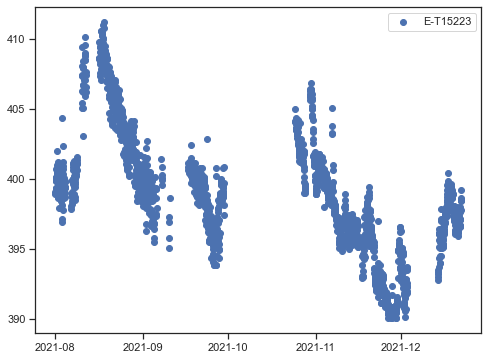

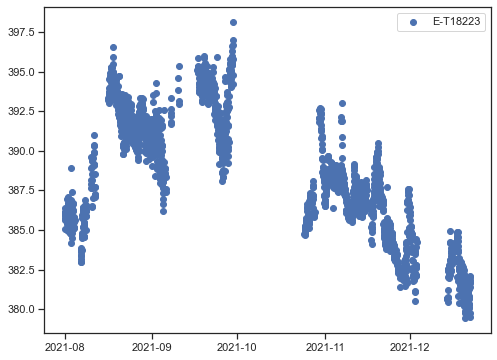

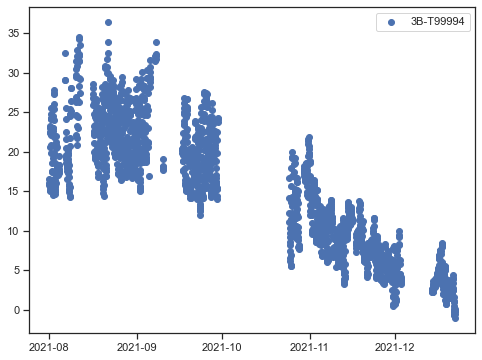

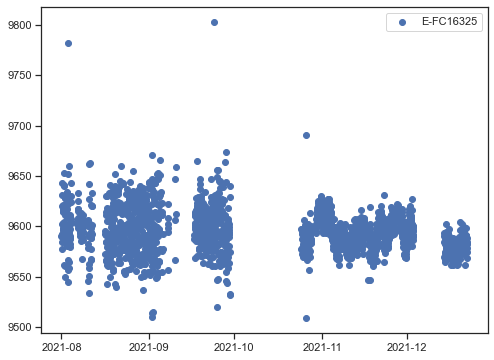

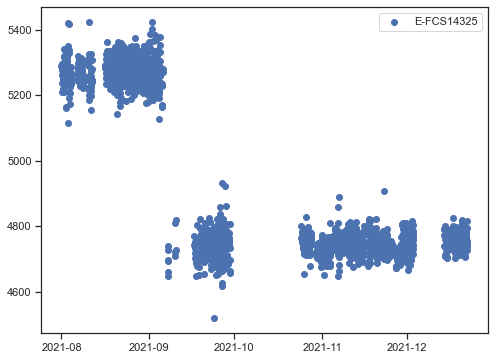

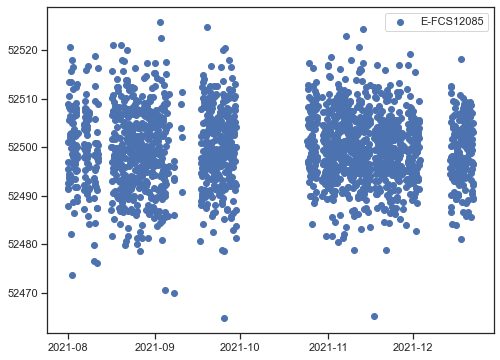

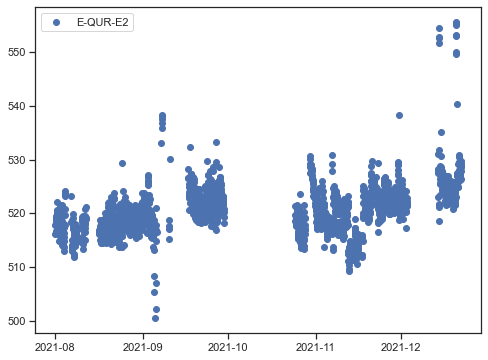

In [306]:
for tag in tags:
    plt.figure(figsize=(8,6))
# plt.plot(result[tags[0]],label=tags[0])
    plt.scatter(result.index ,result[tag],label=tag)
    plt.legend()

In [307]:
def get_perf(row):
    crit = 'E-QUR-E2'
    if row['E-QUR-E2'] > 540:
        ret=10
    elif row['E-QUR-E2']>535:
        ret=9
    elif row['E-QUR-E2']>530:
        ret=8
    elif row['E-QUR-E2']>525:
        ret=7
    elif row['E-QUR-E2']>520:
        ret=6
    elif row['E-QUR-E2']>515:
        ret=5
    elif row['E-QUR-E2']>510:
        ret=4
    elif row['E-QUR-E2']>505:
        ret=3
    elif row['E-QUR-E2']>500:
        ret=2
    elif row['E-QUR-E2']>495:
        ret=1
    else:
        ret =0
    return ret   

In [308]:
level = [520, 525,530,535,540,545]
result['perf'] = result.apply(get_perf,axis=1)
result.describe()

,E-T15223,E-T18223,3B-T99994,E-FC16325,E-FCS14325,E-FCS12085,E-QUR-E2,perf
count,1995.000000,1995.000000,1981.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,398.992322,388.366312,14.533678,9594.727032,4913.963480,52499.930462,520.609023,5.613033
std,4.201412,3.953880,7.893969,21.438156,249.148002,7.724557,4.710344,0.909457
min,390.011550,379.408383,-1.130990,9508.423833,4518.960667,52464.730000,500.380717,2.000000
25%,396.271908,385.510000,7.557460,9580.689583,4734.002833,52494.970833,517.627767,5.000000
50%,398.897783,388.050250,14.863562,9592.974167,4764.242833,52499.876667,520.299200,6.000000
75%,401.045258,391.661225,20.599178,9606.889000,5241.983667,52505.204167,523.122967,6.000000
max,411.202033,398.136250,36.438858,9802.977667,5423.452333,52525.861667,555.651517,10.000000


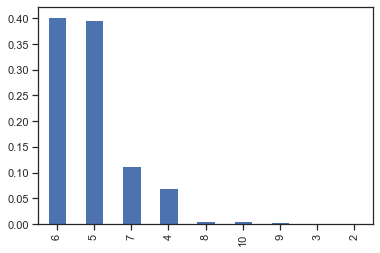

In [309]:
freq = (result.perf.value_counts()/result.shape[0]).plot.bar()

<AxesSubplot:xlabel='E-FC16325', ylabel='Count'>

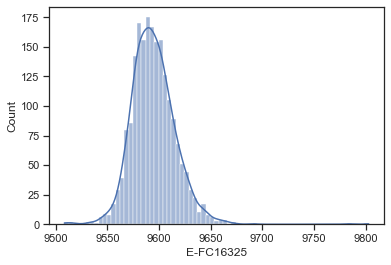

In [310]:
sns.color_palette("tab10")
sns.color_palette("rocket", as_cmap=True)
couleur = ['b','g','r','y','g']
sns.histplot(result['E-FC16325'],kde=True , color=couleur[0])

<AxesSubplot:>

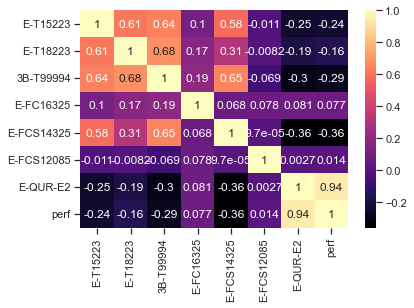

In [311]:
sns.color_palette("tab10")
sns.heatmap(result.corr(),annot=True, cmap='magma')

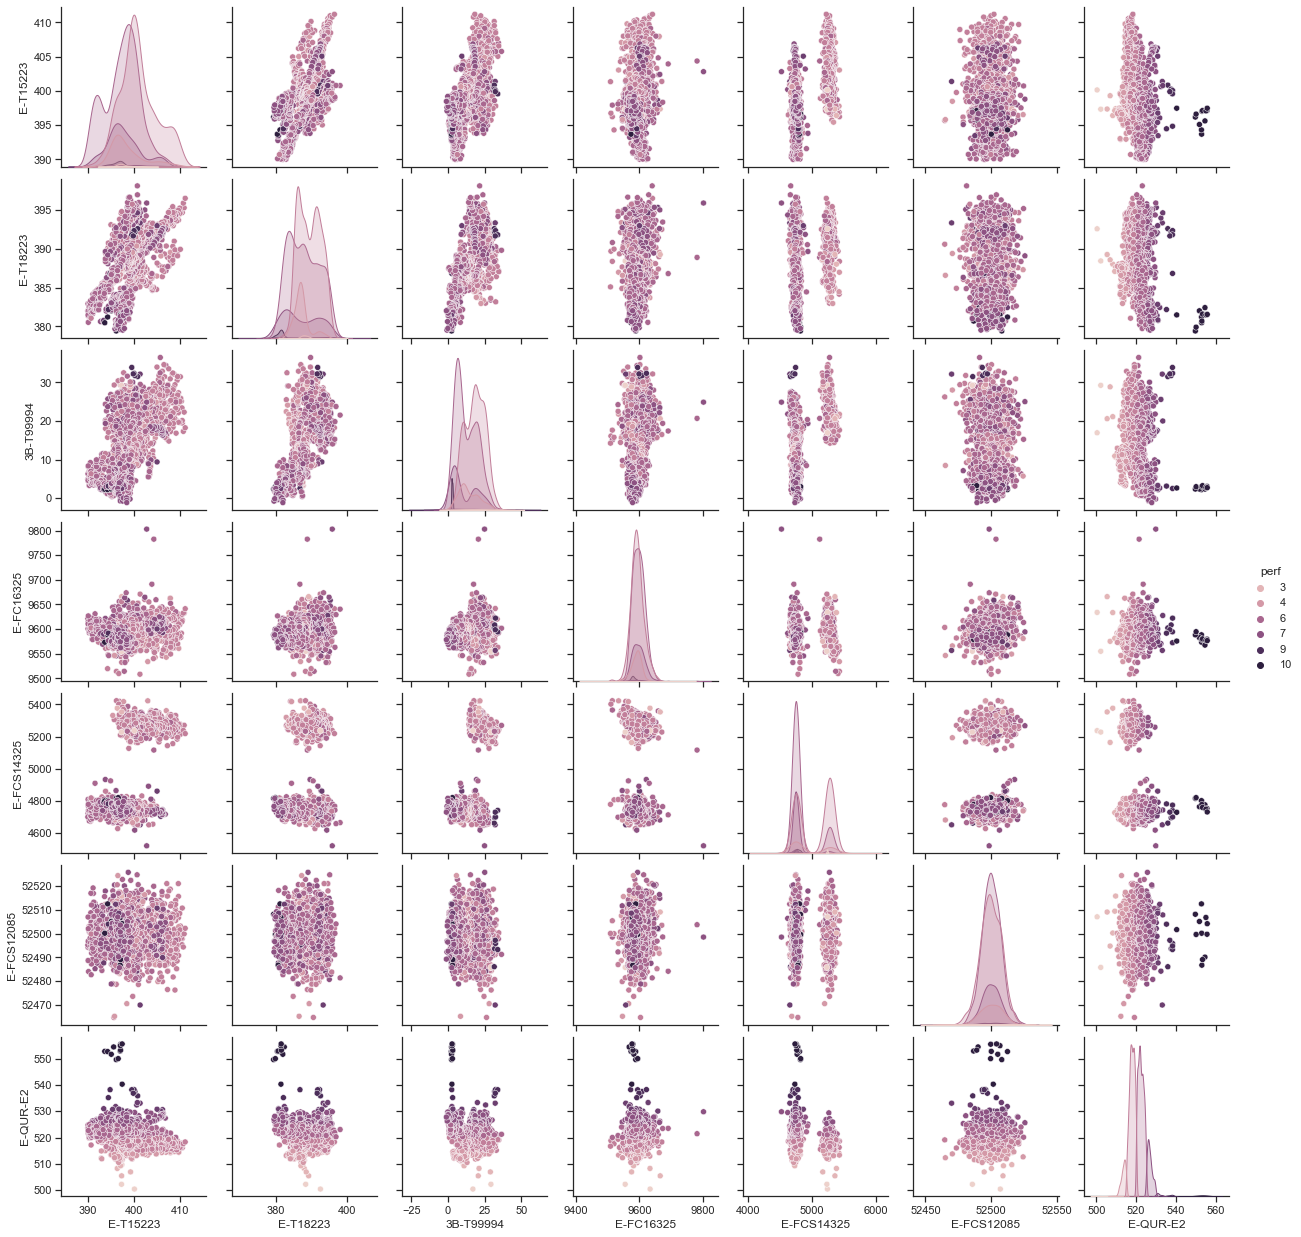

In [313]:
# sns.set_theme(style="ticks")
sns.color_palette("tab10")
sns.pairplot(data=result, hue='perf')